<a href="https://colab.research.google.com/github/rimosh58/TU_math_2022/blob/main/DNN_Hw-01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN 教材

### Perceptron

実際にPerceptronを使って、Irisの花の種類がIris Setosaかそれ以外かを判別するモデルを作る。

__Dataset__ 

50個のIrisの花に関するレコードがある。がく片の幅、がく片の長さ、花弁の長さ、花弁の幅、Irisの花の種類が一つのレコードに含まれている。花の種類は、Iris Setosa、Iris VersicolourとIris Virginicaのどれか。

__Goal__

Irisのがく片と花弁の特徴を基に、IrisがIris Setosaかそれ以外かを判別するモデルを作る

In [1]:
import numpy as np 
from sklearn.datasets import load_iris 
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#データセットをロード
iris = load_iris()

#predictor と　target に分ける
X = iris.data

#Iris Setosaが１の値をとり、それ以外は０
Y = (iris.target == 0).astype(int)

#データセットのシャッフルをして、トレーニング用とテスト用のデータに分ける
#モデルの評価をしっかりやりたい時は、cross validationを実行、さらにハイパーパラメータの最適化を行う
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, random_state = 42, shuffle = True)

#トレーニング
perc_clf = Perceptron()
perc_clf.fit(train_X, train_Y)

#テスト
predictions = perc_clf.predict(test_X)

#Accuracyを計算
print("Accuracy : " +str(accuracy_score(test_Y, predictions)))


Accuracy : 1.0


### Multi Layer Perceptron using Scikit learn

Multi Layer Perceptronを使って、3つのIrisの種類を判別するモデルを作る

__Dataset__

前回と同じ

__Goal__

Irisのがく片と花弁の特徴を基に、Irisの花がIris Setosa、Iris Versicolour、それともIris Virginicaかを判別する。

__Note__


*   一つのクラスの判別に一つのoutput nodeが必要なので、3つのoutput nodeが必要。ただコードを書く際にこの指定は不要。

*   一つ一つのアウトプットノードはそのクラスに当てはまる確率を計算して、出力。



*   一つのレコードに対して一つのクラスが割り当てられているので、その三つのoutput node から出てくる確率の合計は１になる必要がある。



In [2]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#データセットをロード
iris = load_iris()
#predictor と　target に分ける
X = iris.data
Y = iris.target

#データセットのシャッフルをして、トレーニング用とテスト用のデータに分ける
#モデルの評価をしっかりやりたい時は、validationのデータセットを作るのが良い。
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, random_state = 42, shuffle = True)

#二つのHidden Layer を追加、それぞれ10個のニューロンを持つ
mlp_clsf = MLPClassifier((10, 10), activation = 'relu', learning_rate = 'constant', learning_rate_init = 0.001, max_iter = 1000, random_state = 42)
mlp_clsf.fit(train_X, train_Y)
predictions = mlp_clsf.predict(test_X)
print("Accuracy : " +str(accuracy_score(test_Y, predictions)))

Accuracy : 0.9777777777777777


In [3]:
#確率の合計が１かを確認
mlp_clsf.predict_proba(test_X[0].reshape(1, -1)).sum()

1.0

### Activation Function 

このMLPにSoftmaxがactivation functionとして使われている

In [4]:
mlp_clsf.out_activation_

'softmax'

## MLP Regression 

MLP Regressorを用いて、ボストンの住宅価格(単位は1000$)を予測するモデルを作る

__Dataset__ 

1970年代のボストン郊外の住宅地に関するデータセット。ボストン郊外の異なるロケーションで13個の住宅に関する変数と住宅の価格の中央値が記録されている。506個のレコードが記録されている。

__Goal__

その中央値を13個の変数を基に予測する。


　

In [5]:
from sklearn.datasets import load_boston
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#データセットをロード
dataset = load_boston()
X = dataset['data']
Y = dataset['target']

#テストとトレーニングのデータセットに分ける
#モデルの評価をしっかりやりたい時は、validationのデータセットを作るのが良い。
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, random_state = 42, shuffle = True)

#２個のhidden layerを追加　activation function は relu.
mlp_reg = MLPRegressor((10, 10), activation = 'relu', learning_rate = 'constant', learning_rate_init = 0.001, max_iter = 3000, random_state = 42)
mlp_reg.fit(train_X, train_Y)
predictions = mlp_reg.predict(test_X)

#RSMEを計算
error = mean_squared_error(test_Y, predictions) ** (1/2)
print("RSME : " +str(error))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

RSME : 4.699377521565086


::アウトプットノードのActivation functionはIdentity。（Activation function は使われていないということ。）

In [6]:
mlp_reg.out_activation_

'identity'

## Regression using Keras  

In [7]:
import tensorflow as tf 
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

#データセットをダウンロード
house_price = keras.datasets.boston_housing

#データをtraining, validation, test に分ける
(train_X, train_Y), (test_X, test_Y) = house_price.load_data()
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y)

#変数をスケーリング　最適化を早くするため
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)
test_X = scaler.fit_transform(test_X)

#KerasのSequential model を使う
keras_model = keras.models.Sequential()

#インプットレイヤーを追加
keras_model.add(tf.keras.Input(shape = train_X.shape[1:], ))

#Hidden layer を追加
keras_model.add(tf.keras.layers.Dense(30, activation = 'relu'))

#Output layer を追加
keras_model.add(tf.keras.layers.Dense(1))

keras_model.summary()

#モデルをコンパイル
keras_model.compile(loss = 'mean_squared_error', optimizer = 'sgd', 
                    metrics = [tf.keras.metrics.RootMeanSquaredError(name = 'root_mean_squared_error', dtype = None)])

#モデルをトレーニング
#validationのデータセットがあれば、それを渡すことで、validationに関してのlossやRMSEの計算なども簡単にできる
history = keras_model.fit(train_X, train_Y, epochs = 70, validation_data = (valid_X, valid_Y))

65536/57026 [==================================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
10/10 [==============================] - 5s 34ms/step - loss: 201.6518 - root_mean_squared_error: 14.2004 - val_loss: 33.7969 - val_root_mean_squared_error: 5.8135
Epoch 2/70
10/10 [==============================] - 0s 9ms/step - loss: 29.7535 - root_mean_squared_error: 5.4547 - val_loss: 29.4991 - val_root_mean_squared_error: 5.4313
Epoch 3/70
10/10 [==========================

損失関数とRMSEの値をエポックごとにプロットする。ValidationとTraningのデータセットのそれぞれに、その二つの値が計算されている。　エポックはトレーニングのデータセットを何回学習したかを表します。ニューラルネットでは一つのトレーニングのデータセットを何回も学習させます。

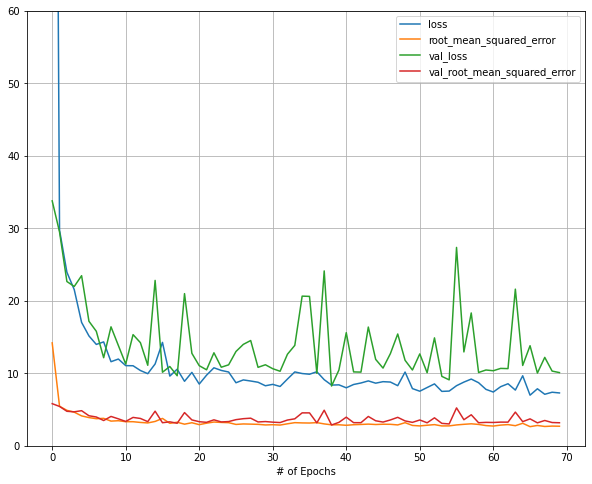

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (10, 8))
plt.grid(True)
plt.gca().set_ylim(0, 60)
plt.xlabel("# of Epochs")
plt.show()

Test Datasetにモデルを適応して、RMSEを計算

In [9]:
mean_squared_error(test_Y,keras_model.predict(test_X)) ** (1/2)

4.634740632823437

## Classificaiton using Keras 

Dataset

手書きの数字を表したイメージが含まれている。イメージは28*28で全７８４ピクセル。

Goal 

イメージが０から９のどの数字なのかを判別する。

In [10]:
#データをダウンロードして、トレーニングとテストに分ける
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data(path = "mnist.npz")

11501568/11490434 [==============================] - 0s 0us/step


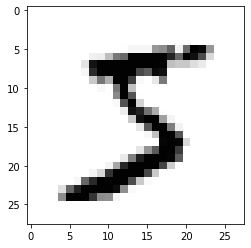

In [11]:
#イメージを実際に視覚化してみる
from matplotlib import pyplot as plt
plt.imshow(train_X[0],cmap='Greys')
plt.show()

In [12]:
import tensorflow as tf 
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

#training と validationに分ける
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y)

#最適化のアルゴリズムを早くするために、変数をスケーリングします。
train_X = train_X / 255.0
valid_X = valid_X / 255.0
test_X = test_X / 255.0

keras_clf = keras.models.Sequential()

#input layerを作る。もともとのinputのデータが2-Dなので、1Dにします。
keras_clf.add(keras.layers.Flatten(input_shape = [28, 28]))

#output layer を作る.10個のクラスがあるので、10個のニューロンが必要。
keras_clf.add(keras.layers.Dense(10, activation = 'softmax'))

keras_clf.summary()
keras_clf.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])
history = keras_clf.fit(train_X, train_Y, epochs = 20, validation_data = (valid_X, valid_Y))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1407/1407 [==============================] - 6s 3ms/step - loss: 0.8840 - accuracy: 0.7870 - val_loss: 0.5555 - val_accuracy: 0.8653
Epoch 2/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4921 - accuracy: 0.8744 - val_loss: 0.4547 - val_accuracy: 0.8817
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4286 - accuracy: 0.8865 - val_loss: 0.4124 - val_accuracy: 0.8908
Epoch 4/20
1407/

 損失関数とaccuracyの値をエポックごとにプロットする。ValidationとTraningのデータセットのそれぞれに、その二つの値が計算されている。

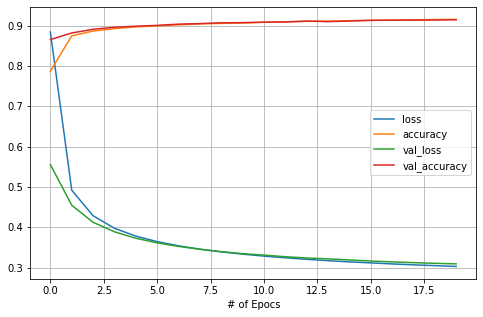

In [13]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()
plt.xlabel("# of Epocs")
plt.show()

### Test データを使って予測してみる

In [14]:
#accuracyを計算
from sklearn.metrics import accuracy_score
print("Accuracy: " +str(accuracy_score(test_Y,keras_clf.predict(test_X).argmax(axis=-1))))

Accuracy: 0.9168


ニューラルネットの学習の視覚化

この数字判別の問題だと、アウトプットノードが１０個あります。それぞれのノードが７８４個のインプットノードとエッジで結ばれていて、そのエッジに重みがつけられています。つまり、一つのクラスに７８４個の重みがあります。

それでは、ここでいう重みの最適化は何を指すのでしょうか？簡単にいうと、あるラベルがついたインプットが来た時、そのラベルを判別するアウトプットノードが他のノードに比べて大きな値を出力できるような重みを計算するのが最適化にあたります。

この数字判別の例だと、仮に１を表すインプットが与えられた時、１を判別するアウトプットノードが一番大きい値を出力するような重みを計算しなければなりません。もう少し詳しくいうと、１という数字のイメージに相関があるピクセルに高い重みを与えればいいのです。そうすれば、インプットと重みのドット積も大きな値を出します。

従って、重みを視覚化すると数字がぼんやりと見えます。下の図は数字の３を判別するアウトプットノードと全てのインプットのエッジの間の重みを視覚化したものです。 赤いとこほど、大きな重みを持っています。

ニューラルネットワークでの学習は重みを最適化することです。あるインプットに紐づいている重みが少ないということは、それほど重要ではないということです。下の図は、そういった意味ではニューラルネットワークが重要だと学習したピクセルの位置を示していると言えます。



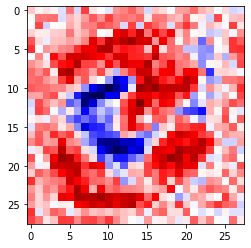

In [15]:
#３のアウトプットノードに関連する重みを全部について、２８＊２８の2-Dに変換
plt.imshow(np.reshape(keras_clf.get_weights()[0][:,3],(28,28)),cmap="seismic")